In [ ]:
import SimpleITK as sitk
from matplotlib import pylab as plt


def showNii(img):
    for i in range(img.shape[0]):
        # for j in range(img.shape[2]):
        plt.imshow(img[:,i,:],cmap='gray')
        plt.show()
 
itk_img = sitk.ReadImage('./sub-0025920_ses-2_dwi_aligned.nii.gz')
img = sitk.GetArrayFromImage(itk_img)
print(img.shape)
showNii(img[0,:,:,:])

In [ ]:
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
 
example_filename = './sub-0025920_ses-2_dwi_tensors_fa_rgb.nii.gz'
 
img = nib.load(example_filename)
print (img)
print (img.header['db_name'])

# img.dataobj.swapaxes(0,1)
print(type(img.dataobj))
# depends on the dimensions (3d or 4d)
width,queue,height,channel=img.dataobj.shape
 
# OrthoSlicer3D(img.dataobj[:,:,:,:]).show()
 
num = 1
for i in range(0,queue,10):
 
    img_arr = img.dataobj[:,i,:]
    plt.figure(figsize=(30,30))
    plt.subplot(4,4,num)
    plt.imshow(img_arr,cmap='gray')
    num +=1
    if num > 16:
        break
 
plt.show()

<class 'networkx.classes.graph.Graph'>
['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_dict_factory', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge'

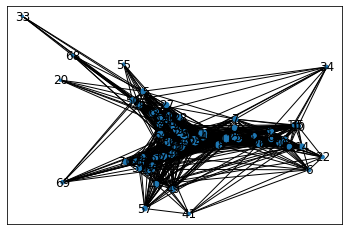

[(1, 60), (2, 21), (3, 27), (4, 41), (5, 58), (7, 24), (8, 25), (9, 21), (10, 23), (11, 49), (12, 23), (13, 30), (14, 27), (15, 25), (16, 20), (17, 24), (18, 37), (19, 31), (21, 25), (23, 28), (24, 46), (25, 44), (26, 33), (27, 27), (28, 29), (29, 50), (30, 28), (31, 24), (32, 22), (34, 11), (35, 19), (36, 50), (37, 31), (38, 27), (39, 39), (40, 47), (42, 37), (43, 33), (44, 31), (45, 32), (46, 44), (47, 30), (48, 28), (49, 28), (50, 28), (51, 31), (52, 35), (53, 35), (54, 30), (56, 22), (57, 22), (59, 40), (60, 40), (61, 43), (62, 27), (63, 25), (64, 41), (65, 27), (66, 29), (67, 31), (70, 25), (6, 15), (22, 12), (58, 23), (41, 10), (69, 14), (20, 6), (33, 5), (68, 9), (55, 8)] 2042


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# import sys
# import importlib
# importlib.reload(sys)
# sys.setdefaultencoding('UTF-8')
%matplotlib inline

import chardet
def ConvertFormat(file):
    with open(file, 'rb+') as f:
        content = f.read()
        encode = chardet.detect(content)['encoding']
        if (encode != 'utf-8'):
            try:
                gbk_Content = content.decode(encode)
                utf_byte = bytes(gbk_Content, encoding='utf8')
                f.seek(0)
                f.write(utf_byte)
            except IOError:
                print('convert {0} fail !!!!!!'.format(file))
    return

# ConvertFormat("./sub-0025920_ses-1_dwi_DS16784.gpickle")
  
# f = open("./sub-0025920_ses-1_dwi_DS16784.gpickle", encoding='cp1254')
# while True:
#     ch = f.read(1)
#     if not ch: break
# print(ch, end="")
# file = f.read()
# for i 
# content = f.read()
# encode = chardet.detect(content)['encoding']
# print(encode)
# encode = chardet.detect(f.read())
# print(encode['encoding'])

G0 = nx.read_gpickle("./BNU1_dMRI/sub-0025920_ses-1_dwi_desikan.gpickle")
print(type(G0))
print(dir(G0))
edge_list_1 = []
edge = G0.edge
for src in edge:
    for dst in edge[src]:
        edge_list_1.append([src, dst, edge[src][dst]['weight']])

G1 = nx.Graph()
G1.add_weighted_edges_from(edge_list_1)
nx.draw_networkx(G1, node_size=np.array(list(dict(G1.degree).values())))
plt.show()
print(G1.degree, len(edge_list_1))
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=False)

In [37]:
import pandas as pd
df = pd.DataFrame([iter + ['undirected'] for iter in edge_list], columns=['source', 'target', 'weight', 'type'])

In [38]:
df.to_csv('brain.csv', index=False)

In [34]:
pd.DataFrame(pd.unique(df.iloc[:, 0]), columns=['id']).to_csv('vertices.csv', index=False)

<class 'networkx.classes.graph.Graph'>
['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge', 'remove_edges_from', 

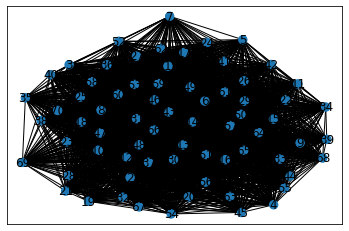

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G00 = nx.read_gpickle("sub-0025920_ses-1_bold_desikan_res-2x2x2_measure-correlation.gpickle")
print(type(G00))
print(dir(G00))
# print(G.adj)
edge_list_2 = []
edge = G00.adj
for src in edge:
    for dst in edge[src]:
        edge_list_2.append([src, dst, edge[src][dst]['weight']])

G2 = nx.Graph()
G2.add_weighted_edges_from(edge_list_2)
nx.draw_networkx(G2, node_size=np.array(list(dict(G2.degree).values())))
plt.show()
    # print(i)
# print(edge_list_2)
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=False)

In [10]:
import pandas as pd
df = pd.DataFrame([iter + ['undirected'] for iter in edge_list], columns=['source', 'target', 'weight', 'type'])
df.to_csv('sub-0025920_fMRI_brain.csv', index=False)
pd.DataFrame(pd.unique(df.iloc[:, 0]), columns=['id']).to_csv('sub-0025920_fMRI_vertices.csv', index=False)

In [27]:
# fMRI edge downsampling (hard threshold)
edge_list_2_downsampling = []
edge_num = 0
for edge in edge_list_2:
    if edge[2] <= 0.5:
        edge_list_2_downsampling.append([edge[0], edge[1], 0])
    else:
        edge_num += 1
        edge_list_2_downsampling.append([edge[0], edge[1], edge[2]])
# print(edge_num, edge_list_2_downsampling)

# matrix version
# A2 = nx.adjacency_matrix(G2).A
A2 = nx.to_numpy_array(G2)
A2 = np.where(A2>0.5,A2,0)
print(A2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
# dMRI edge weights normalization
# matrix version
# A2 = nx.adjacency_matrix(G2).A
np.set_printoptions(threshold=np.inf)
A1 = nx.to_numpy_array(G1)
print(np.count_nonzero(A1))
A1_degree = np.zeros(shape=(A1.shape))
for i in range(A1.shape[0]):
    A1_degree[i][i] = list(G1.degree)[i][1]
# print(-np.sqrt(A1_degree))
A1_normalized = np.matmul(np.matmul((-np.sqrt(A1_degree)), A1), (-np.sqrt(A1_degree)))
# A1_normalized = np.where(A1_normalized>0.5, 10*A1_normalized, 0)
max_value = np.amax(A1_normalized)
A1_normalized = A1_normalized/max_value
A1_normalized = np.where(A1_normalized>0.4, A1_normalized, 0)
# print(A1_normalized)
print(np.count_nonzero(A1_normalized))

2042
62


In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import re
np.set_printoptions(threshold=np.inf)
%matplotlib inline

edge_list_fused_afternorm = []
edge_list_ses1_afternorm = []
edge_list_ses2_afternorm = []
edge_list_ses1_normalized = []
edge_list_ses2_normalized = []
edge_list_property = []
len = 25920 - 25864
# row_num = 0
for i in range(len):
    G0_1 = nx.read_gpickle("./BNU1_dMRI/sub-00%s_ses-1_dwi_desikan.gpickle"%(int(i+25864)))
    G0_2 = nx.read_gpickle("./BNU1_dMRI/sub-00%s_ses-2_dwi_desikan.gpickle"%(int(i+25864)))
    edge_list_ses1 = []
    edge_list_ses2 = []
    edge_1 = G0_1.edge
    edge_2 = G0_2.edge
    for src in edge_1:
        for dst in edge_1[src]:
            edge_list_ses1.append([src, dst, edge_1[src][dst]['weight']])
    for src in edge_2:
        for dst in edge_2[src]:
            edge_list_ses2.append([src, dst, edge_2[src][dst]['weight']])

    G1 = nx.Graph()
    G1.add_weighted_edges_from(edge_list_ses1)
    A1 = nx.to_numpy_array(G1)
#     print(np.count_nonzero(A1))
    A1_degree = np.zeros(shape=(A1.shape))
    for i in range(A1.shape[0]):
        A1_degree[i][i] = list(G1.degree)[i][1]
    # print(-np.sqrt(A1_degree))
    A1_normalized = np.matmul(np.matmul((-np.sqrt(A1_degree)), A1), (-np.sqrt(A1_degree)))
    # A1_normalized = np.where(A1_normalized>0.5, 10*A1_normalized, 0)
    max_value = np.amax(A1_normalized)
    A1_normalized = A1_normalized/max_value
    A1_normalized = np.where(A1_normalized>0.4, A1_normalized, 0)
#     print(np.count_nonzero(A1_normalized))
    edge_list_ses1_normalized = list(zip(*np.nonzero(A1_normalized)))
#     print(edge_list_ses1_normalized)
    
    G2 = nx.Graph()
    G2.add_weighted_edges_from(edge_list_ses2)
    A2 = nx.to_numpy_array(G2)
#     print(np.count_nonzero(A2))
    A2_degree = np.zeros(shape=(A2.shape))
    for i in range(A2.shape[0]):
        A2_degree[i][i] = list(G2.degree)[i][1]
    # print(-np.sqrt(A1_degree))
    A2_normalized = np.matmul(np.matmul((-np.sqrt(A2_degree)), A2), (-np.sqrt(A2_degree)))
    # A1_normalized = np.where(A1_normalized>0.5, 10*A1_normalized, 0)
    max_value = np.amax(A2_normalized)
    A2_normalized = A2_normalized/max_value
    A2_normalized = np.where(A2_normalized>0.4, A2_normalized, 0)
    edge_list_ses2_normalized = list(zip(*np.nonzero(A2_normalized)))
#     print(np.count_nonzero(A2_normalized))
#     print(edge_list_ses2_normalized)
    
    for e1 in edge_list_ses1_normalized:
        edge_list_ses1_afternorm.append([i, e1[0], e1[1]])
    for e2 in edge_list_ses2_normalized:
        edge_list_ses2_afternorm.append([i, e2[0], e2[1]])
    
    
    # Simply fusing two sessions (can be updated)
    for e1 in edge_list_ses1_normalized:
        if e1 not in edge_list_ses2_normalized:
            edge_list_fused_afternorm.append([i, e1[0], e1[1]])
    for e2 in edge_list_ses2_normalized:
        edge_list_fused_afternorm.append([i, e2[0], e2[1]])
#             if 
    f = csv.reader(open('./BNU1_fMRI/BNU1_phenotypic_data.csv','r'))
    for j, row in enumerate(f):
        if j != 0 and j % 2 ==1:
            label = row[3]
            filter(str.isdigit, label)
            edge_list_property.append([i, int(label)-1, 70])
            
        
    df = pd.DataFrame([iter for iter in edge_list_fused_afternorm], columns=['graph_id', 'source', 'target'])
    df.to_csv('./BNU1_dMRI/dMRI_brain_graph_edges_fused.csv', index=False)
    df = pd.DataFrame([iter for iter in edge_list_ses1_afternorm], columns=['graph_id', 'source', 'target'])
    df.to_csv('./BNU1_dMRI/dMRI_brain_graph_edges_ses1.csv', index=False)
    df = pd.DataFrame([iter for iter in edge_list_ses2_afternorm], columns=['graph_id', 'source', 'target'])
    df.to_csv('./BNU1_dMRI/dMRI_brain_graph_edges_ses2.csv', index=False)
    df1 = pd.DataFrame([iter for iter in edge_list_property], columns=['graph_id', 'label', 'num_nodes'])
    df1.to_csv('./BNU1_dMRI/dMRI_brain_graph_properties.csv', index=False)

56
[(0, 3), (0, 4), (0, 22), (0, 33), (0, 37), (3, 0), (3, 4), (3, 22), (3, 26), (3, 33), (3, 37), (4, 0), (4, 3), (4, 21), (4, 26), (4, 33), (4, 37), (4, 52), (4, 57), (21, 4), (21, 33), (21, 37), (22, 0), (22, 3), (26, 3), (26, 4), (26, 37), (33, 0), (33, 3), (33, 4), (33, 21), (33, 36), (33, 37), (33, 52), (33, 53), (33, 57), (36, 33), (36, 57), (37, 0), (37, 3), (37, 4), (37, 21), (37, 26), (37, 33), (37, 52), (37, 53), (37, 57), (52, 4), (52, 33), (52, 37), (53, 33), (53, 37), (57, 4), (57, 33), (57, 36), (57, 37)]
46
[(0, 3), (0, 4), (0, 22), (0, 32), (0, 36), (3, 0), (3, 22), (3, 26), (4, 0), (4, 21), (4, 32), (4, 36), (4, 50), (4, 55), (21, 4), (21, 32), (21, 36), (22, 0), (22, 3), (26, 3), (32, 0), (32, 4), (32, 21), (32, 35), (32, 36), (32, 50), (32, 51), (32, 55), (35, 32), (35, 55), (36, 0), (36, 4), (36, 21), (36, 32), (36, 50), (36, 51), (36, 55), (50, 4), (50, 32), (50, 36), (51, 32), (51, 36), (55, 4), (55, 32), (55, 35), (55, 36)]
52
[(0, 3), (0, 4), (0, 24), (0, 28), 

[(0, 3), (0, 4), (0, 22), (0, 23), (0, 33), (0, 37), (3, 0), (3, 23), (3, 27), (4, 0), (4, 22), (4, 27), (4, 33), (4, 37), (4, 53), (16, 22), (16, 23), (22, 0), (22, 4), (22, 16), (22, 23), (22, 37), (22, 53), (23, 0), (23, 3), (23, 16), (23, 22), (27, 3), (27, 4), (33, 0), (33, 4), (33, 36), (33, 37), (33, 54), (33, 58), (36, 33), (36, 54), (36, 58), (37, 0), (37, 4), (37, 22), (37, 33), (37, 53), (37, 54), (37, 58), (48, 54), (53, 4), (53, 22), (53, 37), (54, 33), (54, 36), (54, 37), (54, 48), (58, 33), (58, 36), (58, 37)]
42
[(0, 4), (0, 22), (0, 32), (0, 36), (3, 26), (4, 0), (4, 21), (4, 32), (4, 36), (4, 50), (16, 21), (16, 22), (21, 4), (21, 16), (21, 22), (21, 36), (21, 50), (22, 0), (22, 16), (22, 21), (26, 3), (32, 0), (32, 4), (32, 36), (32, 51), (35, 55), (36, 0), (36, 4), (36, 21), (36, 32), (36, 50), (36, 51), (46, 51), (50, 4), (50, 21), (50, 36), (50, 51), (51, 32), (51, 36), (51, 46), (51, 50), (55, 35)]
40
[(0, 3), (0, 4), (0, 23), (0, 33), (0, 37), (3, 0), (3, 4), (3

36
[(0, 4), (0, 16), (0, 22), (0, 32), (3, 26), (4, 0), (4, 21), (4, 26), (4, 32), (4, 36), (16, 0), (16, 21), (21, 4), (21, 16), (21, 32), (21, 36), (22, 0), (26, 3), (26, 4), (26, 32), (26, 36), (32, 0), (32, 4), (32, 21), (32, 26), (32, 36), (32, 50), (32, 51), (36, 4), (36, 21), (36, 26), (36, 32), (36, 49), (49, 36), (50, 32), (51, 32)]
46
[(0, 3), (0, 4), (0, 22), (0, 32), (0, 36), (3, 0), (3, 22), (3, 26), (4, 0), (4, 21), (4, 26), (4, 32), (4, 36), (4, 52), (16, 22), (21, 4), (21, 32), (21, 36), (22, 0), (22, 3), (22, 16), (26, 3), (26, 4), (32, 0), (32, 4), (32, 21), (32, 36), (32, 48), (32, 52), (32, 53), (32, 57), (35, 57), (36, 0), (36, 4), (36, 21), (36, 32), (36, 52), (48, 32), (48, 53), (52, 4), (52, 32), (52, 36), (53, 32), (53, 48), (57, 32), (57, 35)]
30
[(0, 3), (0, 4), (0, 23), (0, 33), (3, 0), (3, 23), (3, 27), (4, 0), (4, 33), (4, 37), (23, 0), (23, 3), (27, 3), (33, 0), (33, 4), (33, 36), (33, 37), (33, 47), (33, 51), (36, 33), (36, 47), (36, 51), (37, 4), (37, 3

54
[(0, 3), (0, 4), (0, 21), (0, 22), (0, 32), (0, 36), (3, 0), (3, 4), (3, 22), (3, 26), (3, 32), (3, 36), (4, 0), (4, 3), (4, 21), (4, 32), (4, 36), (4, 51), (21, 0), (21, 4), (21, 32), (21, 36), (21, 51), (22, 0), (22, 3), (26, 3), (32, 0), (32, 3), (32, 4), (32, 21), (32, 36), (32, 51), (32, 52), (35, 52), (35, 56), (36, 0), (36, 3), (36, 4), (36, 21), (36, 32), (36, 51), (36, 52), (36, 56), (51, 4), (51, 21), (51, 32), (51, 36), (51, 52), (52, 32), (52, 35), (52, 36), (52, 51), (56, 35), (56, 36)]
38
[(0, 3), (0, 4), (0, 22), (0, 32), (0, 36), (3, 0), (3, 22), (3, 26), (4, 0), (4, 21), (4, 26), (4, 32), (4, 36), (21, 4), (21, 32), (21, 36), (22, 0), (22, 3), (22, 26), (26, 3), (26, 4), (26, 22), (26, 36), (32, 0), (32, 4), (32, 21), (32, 36), (32, 48), (35, 48), (35, 52), (36, 0), (36, 4), (36, 21), (36, 26), (36, 32), (48, 32), (48, 35), (52, 35)]
34
[(0, 3), (0, 4), (0, 21), (0, 25), (0, 31), (0, 35), (3, 0), (3, 25), (4, 0), (4, 20), (4, 31), (4, 35), (20, 4), (21, 0), (25, 0),

[(0, 3), (0, 4), (0, 23), (0, 34), (0, 38), (3, 0), (3, 4), (3, 23), (3, 27), (3, 34), (3, 38), (4, 0), (4, 3), (4, 22), (4, 27), (4, 34), (4, 38), (4, 59), (22, 4), (22, 34), (22, 38), (23, 0), (23, 3), (23, 27), (27, 3), (27, 4), (27, 23), (27, 34), (27, 38), (34, 0), (34, 3), (34, 4), (34, 22), (34, 27), (34, 37), (34, 38), (34, 55), (34, 59), (37, 34), (37, 59), (38, 0), (38, 3), (38, 4), (38, 22), (38, 27), (38, 34), (38, 59), (55, 34), (59, 4), (59, 34), (59, 37), (59, 38)]
60
[(0, 3), (0, 4), (0, 22), (0, 26), (0, 33), (0, 37), (3, 0), (3, 4), (3, 22), (3, 26), (3, 33), (3, 37), (3, 54), (4, 0), (4, 3), (4, 21), (4, 26), (4, 33), (4, 37), (4, 54), (21, 4), (22, 0), (22, 3), (22, 26), (25, 26), (26, 0), (26, 3), (26, 4), (26, 22), (26, 25), (26, 33), (26, 37), (26, 54), (33, 0), (33, 3), (33, 4), (33, 26), (33, 36), (33, 37), (33, 50), (33, 54), (36, 33), (36, 54), (37, 0), (37, 3), (37, 4), (37, 26), (37, 33), (37, 49), (37, 54), (49, 37), (50, 33), (50, 54), (54, 3), (54, 4), (

54
[(0, 3), (0, 4), (0, 24), (0, 28), (0, 35), (0, 39), (3, 0), (3, 4), (3, 24), (3, 28), (3, 35), (3, 39), (4, 0), (4, 3), (4, 28), (4, 35), (4, 39), (24, 0), (24, 3), (24, 28), (28, 0), (28, 3), (28, 4), (28, 24), (28, 35), (28, 39), (35, 0), (35, 3), (35, 4), (35, 28), (35, 38), (35, 39), (35, 51), (35, 52), (35, 53), (35, 56), (38, 35), (38, 56), (39, 0), (39, 3), (39, 4), (39, 28), (39, 35), (39, 51), (39, 56), (51, 35), (51, 39), (51, 52), (52, 35), (52, 51), (53, 35), (56, 35), (56, 38), (56, 39)]
54
[(0, 3), (0, 4), (0, 23), (0, 27), (0, 34), (0, 38), (3, 0), (3, 4), (3, 23), (3, 27), (3, 34), (3, 38), (4, 0), (4, 3), (4, 22), (4, 27), (4, 34), (4, 38), (22, 4), (23, 0), (23, 3), (23, 27), (27, 0), (27, 3), (27, 4), (27, 23), (27, 34), (27, 38), (34, 0), (34, 3), (34, 4), (34, 27), (34, 37), (34, 38), (34, 52), (34, 53), (34, 57), (37, 34), (37, 57), (38, 0), (38, 3), (38, 4), (38, 27), (38, 34), (38, 52), (38, 57), (52, 34), (52, 38), (52, 53), (53, 34), (53, 52), (57, 34), (5

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import re
%matplotlib inline

edge_list_2_downsampling = []
edge_list_2_property = []
len = 25920 - 25864
# row_num = 0
for i in range(len):
    G00 = nx.read_gpickle("./BNU1_fMRI/sub-00%s_ses-1_bold_desikan_res-2x2x2_measure-correlation.gpickle"%(int(i+25864)))
#     print(type(G00))
#     print(dir(G00))
    # print(G.adj)
    edge_list_2 = []
    edge = G00.adj
    for src in edge:
        for dst in edge[src]:
            edge_list_2.append([src, dst, edge[src][dst]['weight']])
    edge_num = 0
    for edge in edge_list_2:
        if edge[2] <= 0.5:
            continue
        else:
            edge_num += 1
            edge_list_2_downsampling.append([i, edge[0], edge[1]])
#     G2 = nx.Graph()
#     G2.add_weighted_edges_from(edge_list_2)
#     nx.draw_networkx(G2, node_size=np.array(list(dict(G2.degree).values())))
#     plt.show()
    f = csv.reader(open('./BNU1_fMRI/BNU1_phenotypic_data.csv','r'))
    for j, row in enumerate(f):
        if j != 0 and j % 2 ==1:
            label = row[3]
            filter(str.isdigit, label)
            edge_list_2_property.append([i, int(label)-1, 70])
            
        
    df = pd.DataFrame([iter for iter in edge_list_2_downsampling], columns=['graph_id', 'source', 'target'])
    df.to_csv('./BNU1_fMRI/fMRI_brain_graph_edges.csv', index=False)
    df1 = pd.DataFrame([iter for iter in edge_list_2_property], columns=['graph_id', 'label', 'num_nodes'])
    df1.to_csv('./BNU1_fMRI/fMRI_brain_graph_properties.csv', index=False)

In [ ]:
# Fusing dMRI and fMRI graph
    

In [1]:
import dgl

edges = pd.read_csv('./BNU1_fMRI/fMRI_brain_graph_edges.csv')
properties = pd.read_csv('./BNU1_fMRI/fMRI_brain_graph_properties.csv')

edges.head()

properties.head()

class BNU1_Dataset(DGLDataset):
    def __init__(self):
        super().__init__(name='synthetic')

    def process(self):
        edges = pd.read_csv('./graph_edges.csv')
        properties = pd.read_csv('./graph_properties.csv')
        self.graphs = []
        self.labels = []

        # Create a graph for each graph ID from the edges table.
        # First process the properties table into two dictionaries with graph IDs as keys.
        # The label and number of nodes are values.
        label_dict = {}
        num_nodes_dict = {}
        for _, row in properties.iterrows():
            label_dict[row['graph_id']] = row['label']
            num_nodes_dict[row['graph_id']] = row['num_nodes']

        # For the edges, first group the table by graph IDs.
        edges_group = edges.groupby('graph_id')

        # For each graph ID...
        for graph_id in edges_group.groups:
            # Find the edges as well as the number of nodes and its label.
            edges_of_id = edges_group.get_group(graph_id)
            src = edges_of_id['src'].to_numpy()
            dst = edges_of_id['dst'].to_numpy()
            num_nodes = num_nodes_dict[graph_id]
            label = label_dict[graph_id]

            # Create a graph and add it to the list of graphs and labels.
            g = dgl.graph((src, dst), num_nodes=num_nodes)
            self.graphs.append(g)
            self.labels.append(label)

        # Convert the label list to tensor for saving.
        self.labels = torch.LongTensor(self.labels)

    def __getitem__(self, i):
        return self.graphs[i], self.labels[i]

    def __len__(self):
        return len(self.graphs)

dataset = SyntheticDataset()
graph, label = dataset[0]
print(graph, label)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Using backend: pytorch


Exception: Detected an old version of PyTorch. Please update torch>=1.5.0 for the best experience.